In [55]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv('BD preprocesada II.csv',sep=',')

# Formatear columna Fecha como datetime

df['Fecha'] = pd.to_datetime(df['Fecha'])

# df = df[['Fecha','AUM FIC']]

df = df.rename(columns={'Fecha':'ds','AUM FIC':'y'})

df.drop_duplicates(keep='first',inplace=True,ignore_index=False)


df.tail()



,ds,y,Efectivo,Reserva Bancaria,Del sector privado,Del sector público,Cuentas de ahorro,CDT 1/,Otros depósitos a la vista,Inflación anual %,...,Tasa A 120 días,Tasa Entre 121 y 179 días,Tasa A 180 días,Tasa Entre 181 y 359 días,Tasa A 360 días,Tasa Superiores a 360 días,Tasa Captaciones a través de CDT por red de oficinas,Tasa Captaciones a través de CDT por tesorería,Valor hoy,VALOR
2428,2024-08-03,8.276074e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2429,2024-08-04,8.277857e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2430,2024-08-05,8.297109e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2431,2024-08-06,8.339252e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2432,2024-08-07,8.335225e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05


In [5]:
def train_val_test_split(serie,tr_size=0.90,ts_size=0.1):

     N = serie.shape[0]

     Ntrain = int(tr_size*N) # Número de datos de entrenamiento

     Ntest = int(ts_size *N) # Número de datos de validación


     # Partición

     train = serie[0:Ntrain]
     test = serie[Ntrain:]

     return train,test

In [53]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, mape

In [6]:
tr,ts = train_val_test_split(df)

print(f'Tamaño set de entrenamiento: {tr.shape}')

print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (2169, 29)
Tamaño set de prueba: (242, 29)


In [90]:
model = ExponentialSmoothing(tr['y'],trend='multiplicative',seasonal='multiplicative', seasonal_periods=180)

fit = model.fit(optimized=True)  # Parámetro alfa

forecast = fit.forecast(ts.shape[0])

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return ge

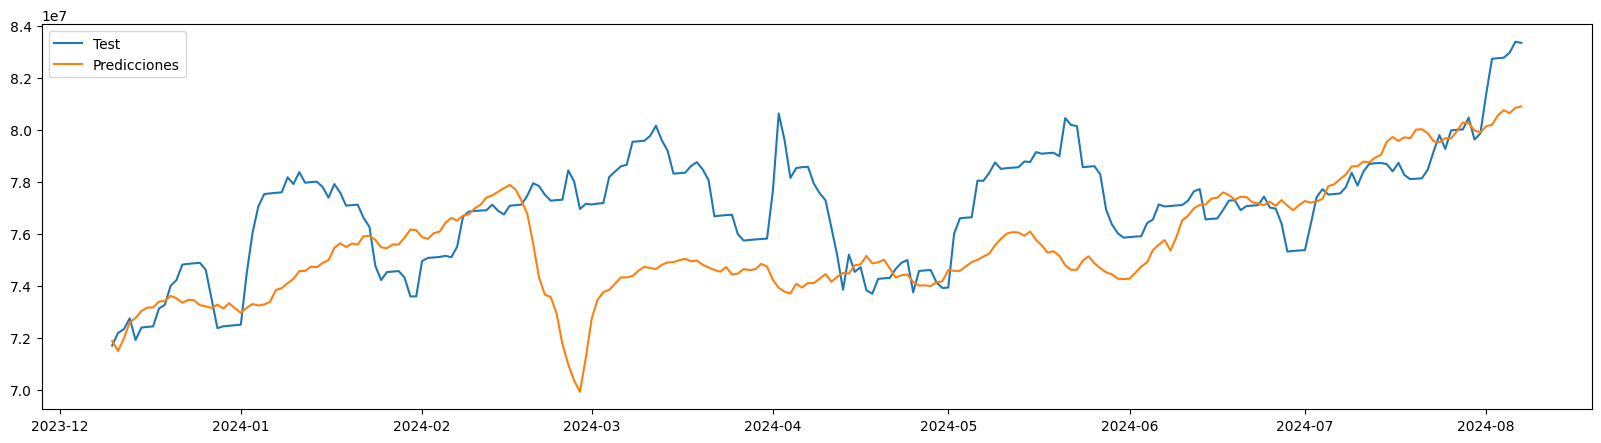

In [91]:
fig ,ax = plt.subplots(figsize = (20,5))
plt.plot(ts['ds'], ts['y'], label='Test')
plt.plot(ts['ds'], forecast, label='Predicciones')
plt.legend()
plt.show()

In [93]:
metricas_Suavizado_Exponencial= calculate_metrics(ts['y'],forecast)

# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['Suavizado_Exponencial'],
    'MSE': [metricas_Suavizado_Exponencial[0]],
    'RMSE': [metricas_Suavizado_Exponencial[1]],
    'MAE': [metricas_Suavizado_Exponencial[2],],
    'MAPE': [metricas_Suavizado_Exponencial[3]]
})

resultados

,Model,MSE,RMSE,MAE,MAPE
0,Suavizado_Exponencial,6.513493e+12,2.552155e+06,1.936335e+06,2.93322
